In [1]:
import pandas as pd
pd.__version__

'1.2.4'

In [2]:
# to imbed plots, prevents pop-up windows for plots (Jupyter syntax)
%matplotlib inline

In [13]:
# Reading data from a file

google = pd.read_csv('/Users/mshayganfar/springboard/strata_data-master/data/goog.csv', index_col='Date', parse_dates=True)
google

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,313.16,314.44,311.81,313.06,NaN
2010-01-05,313.28,313.61,310.46,311.68,NaN
2010-01-06,312.62,312.62,302.88,303.83,NaN
2010-01-07,304.40,304.70,296.03,296.75,NaN
2010-01-08,295.70,301.32,294.26,300.71,NaN
...,...,...,...,...,...
2014-12-24,530.51,531.76,527.02,528.77,704035.0
2014-12-26,528.77,534.25,527.31,534.03,1037727.0
2014-12-29,532.19,535.48,530.01,530.33,2276104.0


In [10]:
!conda install -y pandas-datareader

Solving environment: done

## Package Plan ##

  environment location: /Users/mshayganfar/opt/anaconda3

  added / updated specs:
    - pandas-datareader


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.10.3               |   py38hecd8cb5_0         2.9 MB
    pandas-datareader-0.10.0   |     pyhd3eb1b0_0          71 KB
    ------------------------------------------------------------
                                           Total:         2.9 MB

The following NEW packages will be INSTALLED:

  pandas-datareader  pkgs/main/noarch::pandas-datareader-0.10.0-pyhd3eb1b0_0

The following packages will be SUPERSEDED by a higher-priority channel:

  conda              conda-forge::conda-4.10.3-py38h50d173~ --> pkgs/main::conda-4.10.3-py38hecd8cb5_0



pandas-datareader-0. | 71 KB     | ##################################### | 100% 
conda-4.10.3         | 2.9 MB    | ###################

In [11]:
# Reading data from the Web
from pandas_datareader import data as pd_data

In [17]:
start  = pd.Timestamp('2010-1-1')
end    = pd.Timestamp('2014-12-31')
google = pd_data.DataReader("GOOG", 'yahoo', start, end)

## Note: this is how we generated the data file read above!
# google.to_csv('data/goog.csv', index=True, encoding='utf-8')
google

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,313.579620,310.954468,312.304413,312.204773,3927065.0,312.204773
2010-01-05,312.747742,309.609497,312.418976,310.829926,6031925.0,310.829926
2010-01-06,311.761444,302.047852,311.761444,302.994293,7987226.0,302.994293
2010-01-07,303.861053,295.218445,303.562164,295.940735,12876685.0,295.940735
2010-01-08,300.498657,293.455048,294.894653,299.885956,9484016.0,299.885956
...,...,...,...,...,...,...
2014-12-24,530.303040,525.577026,529.057495,527.322266,705933.0,527.322266
2014-12-26,532.787231,525.866211,527.322266,532.567810,1040549.0,532.567810
2014-12-29,534.013855,528.559814,530.732849,528.877991,2278539.0,528.877991


In [18]:
type(google)

pandas.core.frame.DataFrame

## Data Inspection

Use the method `DataFrame.head()` to inspect the first few rows of data:
* great way to inspect smaller data sets
* useful for verifying you've read the right file

In [19]:
google.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,313.579620,310.954468,312.304413,312.204773,3927065.0,312.204773
2010-01-05,312.747742,309.609497,312.418976,310.829926,6031925.0,310.829926
2010-01-06,311.761444,302.047852,311.761444,302.994293,7987226.0,302.994293
2010-01-07,303.861053,295.218445,303.562164,295.940735,12876685.0,295.940735
2010-01-08,300.498657,293.455048,294.894653,299.885956,9484016.0,299.885956


In [20]:
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2010-01-04 to 2014-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1258 non-null   float64
 1   Low        1258 non-null   float64
 2   Open       1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Volume     1258 non-null   float64
 5   Adj Close  1258 non-null   float64
dtypes: float64(6)
memory usage: 68.8 KB


## Data Indexing

* Pandas DataFrames have a special Index, goes beyond integer indexing
* Pandas DataFrames are indexed by column label, then (row) Index:

In [21]:
google['Open']

Date
2010-01-04    312.304413
2010-01-05    312.418976
2010-01-06    311.761444
2010-01-07    303.562164
2010-01-08    294.894653
                 ...    
2014-12-24    529.057495
2014-12-26    527.322266
2014-12-29    530.732849
2014-12-30    526.644104
2014-12-31    529.795471
Name: Open, Length: 1258, dtype: float64

In [22]:
# Inspect the first 5 rows or the 'Open' column, using integer indexing

google['Open'].iloc[0:5]

Date
2010-01-04    312.304413
2010-01-05    312.418976
2010-01-06    311.761444
2010-01-07    303.562164
2010-01-08    294.894653
Name: Open, dtype: float64

In [23]:
# Inspect the first 5 rows or the 'Open' column, using date indexing

google.loc['2010-01-04':'2010-01-08','Open']

Date
2010-01-04    312.304413
2010-01-05    312.418976
2010-01-06    311.761444
2010-01-07    303.562164
2010-01-08    294.894653
Name: Open, dtype: float64

## Data Filtering

In [24]:
# Filtering by conditional
google_up = google[ google['Close'] > google['Open'] ]
google_up.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-08,300.498657,293.455048,294.894653,299.885956,9484016.0,299.885956
2010-01-13,293.091431,285.878448,287.168610,292.448822,13041902.0,292.448822
2010-01-14,295.990570,290.316833,290.859772,293.823669,8511986.0,293.823669
2010-01-19,294.107605,287.069000,289.514832,292.712830,8665760.0,292.712830
2010-01-26,273.773834,267.143677,267.980530,270.197235,8743651.0,270.197235


In [25]:
# Filtering out missing data

google_filtered = google[pd.isnull(google['Volume']) == False ]
google_filtered.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,313.579620,310.954468,312.304413,312.204773,3927065.0,312.204773
2010-01-05,312.747742,309.609497,312.418976,310.829926,6031925.0,310.829926
2010-01-06,311.761444,302.047852,311.761444,302.994293,7987226.0,302.994293
2010-01-07,303.861053,295.218445,303.562164,295.940735,12876685.0,295.940735
2010-01-08,300.498657,293.455048,294.894653,299.885956,9484016.0,299.885956


## Data Statistics

In Pandas we can very easily perform many types of statistical operations. 

In [27]:
google.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000
mean,377.367383,371.049882,374.434646,374.229328,4.893265e+06,374.229328
std,116.003369,114.606947,115.505911,115.334328,3.027504e+06,115.334328
min,220.314209,216.005356,218.336624,217.220810,7.922000e+03,217.220810
25%,287.877205,282.204735,285.010452,284.564621,3.245068e+06,284.564621
50%,319.858597,314.212250,317.746506,316.341782,4.362591e+06,316.341782
75%,454.735542,448.408005,451.777878,451.520088,5.953884e+06,451.520088
max,612.145508,607.024719,611.109436,607.806763,2.976073e+07,607.806763


## Data Computations

One simple example motivated by finance is to compute the "volatility" -- the rolling standard deviation of the log-return over the business days of the year.
* First we use the `pandas` method `.pct_change()` to compute the *return* per day based on percent change.
* Next we use `numpy` to compute the log of the return.
* Finally we use `pandas` method `.rolling_std()` to compute the volatility

In [29]:
# Compute the returns from daily percent change
# Append a new column
google['Return'] = google['Close'].pct_change()
google['Return'].iloc[0:5]

Date
2010-01-04         NaN
2010-01-05   -0.004404
2010-01-06   -0.025209
2010-01-07   -0.023280
2010-01-08    0.013331
Name: Return, dtype: float64

In [30]:
# Compute the log() of the return using numpy
# Append another new column
import numpy as np
google['LogReturn'] = np.log(1+google['Return'])
google['LogReturn'].iloc[0:5]

Date
2010-01-04         NaN
2010-01-05   -0.004413
2010-01-06   -0.025532
2010-01-07   -0.023555
2010-01-08    0.013243
Name: LogReturn, dtype: float64

In [33]:
# Compute volatility as rolling standard deviation of the log() of the returns
# Append yet another new column
window_size = 252
#Old Code: google['Volatility'] = pd.rolling_std(google['LogReturn'], window=window_size) * np.sqrt(window_size)
google['Volatility'] = pd.Series(google['LogReturn']).rolling(window=window_size).std() * np.sqrt(window_size)
google['Volatility'].iloc[window_size-5:window_size+5]

Date
2010-12-27         NaN
2010-12-28         NaN
2010-12-29         NaN
2010-12-30         NaN
2010-12-31         NaN
2011-01-03    0.278490
2011-01-04    0.278480
2011-01-05    0.277550
2011-01-06    0.276632
2011-01-07    0.276359
Name: Volatility, dtype: float64

## Data Visualization

Finally, Pandas is coupled to Matplotlib:
* Columns from a single DataFrame can be plotted using `DataFrame.plot()`.
* Here we will plot the newly created columns of data, `LogReturn` and `Volatility`.

In [34]:
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2010-01-04 to 2014-12-31
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   High        1258 non-null   float64
 1   Low         1258 non-null   float64
 2   Open        1258 non-null   float64
 3   Close       1258 non-null   float64
 4   Volume      1258 non-null   float64
 5   Adj Close   1258 non-null   float64
 6   Return      1257 non-null   float64
 7   LogReturn   1257 non-null   float64
 8   Volatility  1006 non-null   float64
dtypes: float64(9)
memory usage: 130.6 KB


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f96d5bcc0d0>,
      dtype=object)

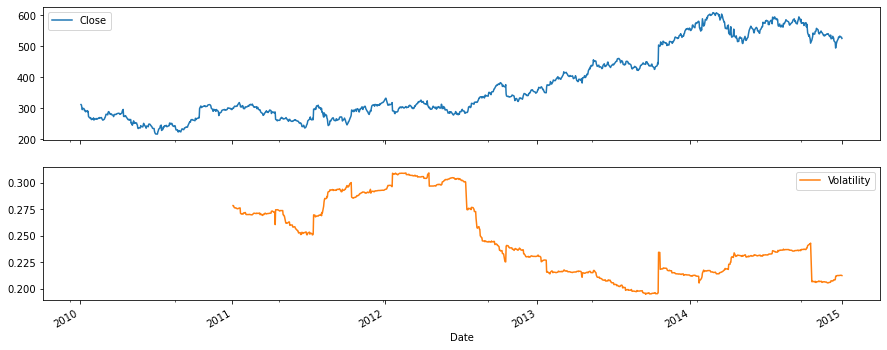

In [35]:
google[['Close','Volatility']].plot(subplots=True, figsize=(15,6))

## Pandas Data Structures: How we work with Data

Pandas provides two primary data structures:
* `Series` is built for 1-dimensional series data
* `DataFrame` is built for 2-dimensional collections of tabular data

These data structures differ and are related as follows:
* **Series**: 1-dimensional array of **homogeneous** data
* **DataFrame**: 2-dimensional table of **heterogeneous** data, composed of multiple **Series**

Each of these also contains an integrated **`index`**:
* **Series** objects include a second array called the **index** that can contain homogeneous values of any type like integers, strings or datetime objects. 
* **DataFrame** objects include a column **index**. The **index** objects allow for very sophisticated selection operations using square brackets (`[]`) along with some specialized selection functions.

*side note: Pandas has another data structure called Panels which is not commonly used*

## Set-up

In [37]:
# Numerical computing
import numpy as np

# Draw pictures!
import matplotlib.pyplot as plt
%matplotlib inline

# Python people are weird!
import pandas as pd

# Set Jupyter notebook display options
pd.options.display.max_rows = 8
pd.options.display.max_columns = 8

# Check version number
pd.__version__

'1.2.4'

# Pandas Series

* Designed for 1-dimensional, homogeneous series data
* Composed of an array of data and an special Index object
* Access to data contents can be done by `position` index (0,1,2,...) or by `label` index ('a','b','c',...)
* Index label type can be integers, strings, or datetime objects. 
* Operations like *retrieving*,  *joining*, and *aligning* data are made easy.

## Creating a Series

In [40]:
# Example: Creating a Series from a data column from file

file   = "/Users/mshayganfar/springboard/strata_data-master/data/exoplanets.csv"
data   = pd.read_csv(file)
series = data['NAME']

print( "\n" )
print( series )

print( "\n" )
print( type( series ) )



0          gamma Cep b
1          HD 114762 b
2       PSR B1257+12 B
3       PSR B1257+12 A
             ...      
1638         WASP-89 b
1639         HD 1666 b
1640        HD 95127 b
1641      Kepler-432 c
Name: NAME, Length: 1642, dtype: object


<class 'pandas.core.series.Series'>


In [41]:
# Example: Creating a Series a list

new_list = [5,10,15,20,25]
pd.Series(new_list)

0     5
1    10
2    15
3    20
4    25
dtype: int64

In [42]:
# Example: Creating a Series from a dictionary... index will be sorted

new_dictionary = {'b': 100, 'a': 200.0, 'd':450, 'c':700}
pd.Series(new_dictionary)

b    100.0
a    200.0
d    450.0
c    700.0
dtype: float64

### With that, you now have enough information to know the Big, Big, Secret of Pandas:
### (Almost) All the complexity in pandas (and it is actually, somewhat complex in parts) arises from the ability to index by *POSITION* (e.g. 0, 1, 2, ith location) and also index by *LABEL* ('a', 'b', 'c', etc.). 

In [43]:
# Example: Creating a Series from an ORDERED dictionary
#          ... to preserver order of the indices.

from collections import OrderedDict
od = OrderedDict([('b', 100), ('a',200), ('d',450), ('c',700)])
pd.Series(od)

b    100
a    200
d    450
c    700
dtype: int64

In [44]:
# Example: Creating a Series from a NumPy array

array1  = np.arange(1,6)*10.0
series1 = pd.Series(array1)

print( "\n" )
print( array1 )
print( type(array1) )

print( "\n" )
print( series1 )
print( type(series1) )



[10. 20. 30. 40. 50.]
<class 'numpy.ndarray'>


0    10.0
1    20.0
2    30.0
3    40.0
4    50.0
dtype: float64
<class 'pandas.core.series.Series'>


## Pandas Index

The pandas Series data structure always has an `Index`

In [45]:
# The default Index is just a sequence of integers:
array1  = np.arange(1,6)*10.0
series1 = pd.Series(array1)

series1.index

RangeIndex(start=0, stop=5, step=1)

In [46]:
# The Index is used for indexing

print( series1.iloc[0] )  # "Positional" indexing

10.0


In [47]:
# The Index can be set to a sequence of labels:

index2 = ['a','b','c','d','a']
series2 = pd.Series(np.arange(1,6)*10.0, index=index2)

In [48]:
# The Index labels are used for indexing

series2.loc['b']  # "label" indexing

20.0

In [49]:
# Indexing when the label is not unique?

series2.loc['a']

a    10.0
a    50.0
dtype: float64

## Iterating over a Series

In [50]:
for key, value in series2.iteritems():
    print(key, value)

a 10.0
b 20.0
c 30.0
d 40.0
a 50.0


## Pandas Slicing

In [51]:
# Be careful when slicing with integers versus labels

print( series2.iloc[1:2]     )  # Positional indexing is permitted with slicing
print("\n")
print( series2.loc['b':'c'] )  # Ranges of labels can be sliced (slicing here is *inclusive*)

b    20.0
dtype: float64


b    20.0
c    30.0
dtype: float64


In [52]:
# Example: slice from the end
series2.iloc[-1:]

a    50.0
dtype: float64

In [53]:
# Example: slice from the beginning
series2.iloc[:-3]

a    10.0
b    20.0
dtype: float64

In [54]:
# Example: slice with labels, but with integer step size
series2.loc['d':'b':-2]

d    40.0
b    20.0
dtype: float64

## Series Arithmetic

In [55]:
# Arithmetic with Series is as with numpy arrays
print(series1)

series2 = series1 * 2 
print(series2)

series3 = series2 * 3
print(series3)

0    10.0
1    20.0
2    30.0
3    40.0
4    50.0
dtype: float64
0     20.0
1     40.0
2     60.0
3     80.0
4    100.0
dtype: float64
0     60.0
1    120.0
2    180.0
3    240.0
4    300.0
dtype: float64


## Series with NumPy

In [56]:
# numpy ufuncs can be applied elementwise to Series

series_2pi = pd.Series( np.linspace(-1*np.pi, +1*np.pi, 100) )
series_2pi

0    -3.141593
1    -3.078126
2    -3.014660
3    -2.951193
        ...   
96    2.951193
97    3.014660
98    3.078126
99    3.141593
Length: 100, dtype: float64

In [57]:
# Even though pandas was built on numpy, numpy methods on Series return a Series

series_sin = np.sin( series_2pi )
print( series_sin )
print( type( series_sin ) )

0    -1.224647e-16
1    -6.342392e-02
2    -1.265925e-01
3    -1.892512e-01
          ...     
96    1.892512e-01
97    1.265925e-01
98    6.342392e-02
99    1.224647e-16
Length: 100, dtype: float64
<class 'pandas.core.series.Series'>


## Series with Matplotlib

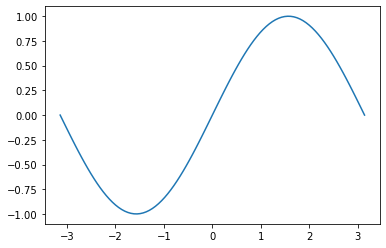

In [58]:
plt.plot(series_2pi, series_sin)

## Series Operations

In [59]:
# You can add two series

series1 = pd.Series([1,2,3,4,5])
print(series1)

series2 = pd.Series([10,20,30,40,50])
print(series2)

series3 = series1 + series2
print(series3)

0    1
1    2
2    3
3    4
4    5
dtype: int64
0    10
1    20
2    30
3    40
4    50
dtype: int64
0    11
1    22
2    33
3    44
4    55
dtype: int64


In [65]:
# Even better when you assign labels to your data!

series1 = pd.Series([1,2,3,4,5],      index=['a','b','c','d','e'])
series2 = pd.Series([10,20,30,40,50], index=['c','d','e','f','g'])

print( series1 + series2 )

# Pandas' default is outer join.

a     NaN
b     NaN
c    13.0
d    24.0
e    35.0
f     NaN
g     NaN
dtype: float64


###  SQL users: what just happened here?

In [61]:
# So when you apply a method like mean(), the NaNs are handled intelligently...

(series1 + series2).mean()

24.0

In [62]:
# Contrast how NumPy and Pandas handle NaN:

print( "Pandas mean: ", pd.Series( [1.0, 2.0, np.nan] ).mean() )
print( "Numpy mean:  ", np.array(  [1.0, 2.0, np.nan] ).mean() )

Pandas mean:  1.5
Numpy mean:   nan


# Pandas DataFrame

What is a DataFrame?

* 2-dimensional labled tabular data (think spreadsheet or SQL table) 
* **heterogeneous** data, composed of multiple **Series**
* an **Index** or "row label" for selection operations

DataFrame inputs:

* python dict of 1D sequences (e.g. ndarrays, lists, dicts, or Series)
* 2-D numpy.ndarray
* pandas Series
* another DataFrame

DataFrame Operations:
- Pandas DataFrame objects have column names:
    - dictionary style: df['DATE']
    - attribute style: df.DATE
- DataFrame binary operations (+ - / *) defaults to outer join, on both columns as well as the index
- NaN can be handled after join

## Creating a DataFrame

In [63]:
# Creating a DataFrame from a file read:

file    = "/Users/mshayganfar/springboard/strata_data-master/data/exoplanets.csv"
df_file = pd.read_csv(file)
df_file

,NAME,FIRSTREF,FIRSTURL,DATE,...,RA_STRING(h:m:s),DEC_STRING(d:m:s),STAR_MASS(msun),STAR_RADIUS(rsun)
0,gamma Cep b,Campbell 1988,http://adsabs.harvard.edu/abs/1988ApJ...331..902C,1988,...,+23:39:20.98,+77:37:55.08,1.260000,5.010000
1,HD 114762 b,Latham 1989,http://adsabs.harvard.edu/abs/1989Natur.339...38L,1989,...,+13:12:20.10,+17:31:01.66,0.894578,0.859205
2,PSR B1257+12 B,Wolszczan 1992,http://adsabs.harvard.edu//abs/1992Natur.355.....,1992,...,13:00:03.577,+12:40:56.4,NaN,NaN
3,PSR B1257+12 A,Wolszczan 1992,http://adsabs.harvard.edu//abs/1992Natur.355.....,1992,...,13:00:03.577,+12:40:56.4,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1638,WASP-89 b,Hellier 2015,http://adsabs.harvard.edu/abs/2015AJ....150...18H,2015,...,20:55:35.98,-18:58:16.1,0.920000,0.880000
1639,HD 1666 b,Harakawa 2015,http://adsabs.harvard.edu/abs/2015ApJ...806....5H,2015,...,+00:20:52.34,-19:55:51.89,1.500000,1.930000
1640,HD 95127 b,Niedzielski 2015,http://adsabs.harvard.edu/abs/2015ApJ...803....1N,2015,...,+10:59:35.10,+43:48:52.17,1.200000,20.000000
1641,Kepler-432 c,Ciceri 2015,http://adsabs.harvard.edu/abs/2015A%26A...573L...,2015,...,19:33:07.729,+48:17:09.,1.320000,4.060000


In [64]:
# Creating a DataFrame from a dictionary

dictionary = {'a':[1,2,3,4,5,6,7,8,9,10],
              'b':np.linspace(0,np.pi,10),
              'c':0.0,
              'd':["a","b","c","a","b","c","a","b","c","a"]}

df_dict = pd.DataFrame(dictionary)
df_dict

,a,b,c,d
0,1,0.000000,0.0,a
1,2,0.349066,0.0,b
2,3,0.698132,0.0,c
3,4,1.047198,0.0,a
...,...,...,...,...
6,7,2.094395,0.0,a
7,8,2.443461,0.0,b
8,9,2.792527,0.0,c
9,10,3.141593,0.0,a


In [66]:
# Inspect the DataFrame colums and index
df_dict.columns

Index(['a', 'b', 'c', 'd'], dtype='object')

In [68]:
df_dict.index

RangeIndex(start=0, stop=10, step=1)

Now use the Pandas `DataFrame.info()` method to see a bit more detail, including:
* the name of each column
* the Numpy dtype of each column
* how many actual values are present
* amount of memory used

*side note: Pandas has excellent support for not-a-number (NaN) entries in DataFrames and Series.*

In [69]:
df_dict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       10 non-null     int64  
 1   b       10 non-null     float64
 2   c       10 non-null     float64
 3   d       10 non-null     object 
dtypes: float64(2), int64(1), object(1)
memory usage: 448.0+ bytes


## DataFrame Indexing

* Pandas DataFrames have a special Index, goes beyond integer indexing
* Pandas DataFrames are indexed by column label, then (row) Index:

In [71]:
df_grades = pd.DataFrame({'Alice' : [1,2,3,4,5], 
                         'Bob':np.random.random(5), 
                         'Chuck' : np.random.random(5)},
                         index=['Jan', 'Feb', 'Mar', 'Apr', 'May'])
df_grades

,Alice,Bob,Chuck
Jan,1,0.358951,0.171053
Feb,2,0.238241,0.049841
Mar,3,0.234513,0.380765
Apr,4,0.804828,0.284848
May,5,0.856041,0.395187


In [72]:
# Indexing is by column first (gives a Series)
series_a = df_grades['Alice']

print( series_a )
print( type(series_a) )

Jan    1
Feb    2
Mar    3
Apr    4
May    5
Name: Alice, dtype: int64
<class 'pandas.core.series.Series'>


In [73]:
# Indexing the column name, gives a Series, then 'positional' indexing
df_grades['Alice'].iloc[1]

2

In [75]:
# Indexing the column name, gives a Series, then 'label' indexing
df_grades.loc['Jan','Alice']

1

## Iterating over a DataFrame

As seen with Series, we can iterate over DataFrames

In [76]:
for key, value in df_grades['Alice'].iteritems():
    print('Key:', '%s' % key, ', Value:', '%s' % value)

Key: Jan , Value: 1
Key: Feb , Value: 2
Key: Mar , Value: 3
Key: Apr , Value: 4
Key: May , Value: 5


In [77]:
# DataFrames support iteration over the Index

for index, row in df_grades.iterrows():
    print('Index:', '%s' % index, ', Row:', '%s' % row['Alice'])

Index: Jan , Row: 1.0
Index: Feb , Row: 2.0
Index: Mar , Row: 3.0
Index: Apr , Row: 4.0
Index: May , Row: 5.0
